In [1]:
# modeling_exercises

# Exercises

1. Clustering with the Iris Dataset: Using this lesson as a guide, perform clustering on the iris dataset.

    a. Choose features other than the ones used in the lesson.
    b. Visualize the results of your clustering.
    c.Use the elbow method to visually select a good value for k.
    d. Repeat the clustering, this time with 3 different features.
    
2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

3. How does scaling impact the results of clustering?

    Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [19]:
# imports
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans


import viz
np.random.seed(4)

In [20]:
from sklearn import datasets
import pandas as pd

# load iris dataset
iris = datasets.load_iris()
# Since this is a bunch, create a dataframe
iris_df=pd.DataFrame(iris.data)
iris_df['class']=iris.target

iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df.dropna(how="all", inplace=True) # remove any empty lines

In [21]:
iris_df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
X = iris_df[['petal_len', 'sepal_len']]

In [23]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [24]:
iris_df['cluster'] = kmeans.predict(X)

In [25]:
viz.clustering_example1(iris)

AttributeError: module 'viz' has no attribute 'clustering_example1'

In [26]:
kmeans.cluster_centers_

array([[5.67804878, 6.83902439],
       [1.49215686, 5.00784314],
       [4.39310345, 5.87413793]])

In [27]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_len,sepal_len
0,5.678049,6.839024
1,1.492157,5.007843
2,4.393103,5.874138


In [28]:
iris_df.groupby('cluster')['petal_len', 'sepal_len'].mean()

,petal_len,sepal_len
cluster,,
0,5.678049,6.839024
1,1.492157,5.007843
2,4.393103,5.874138


Text(0.5, 1.0, 'Visualizing Cluster Centers')

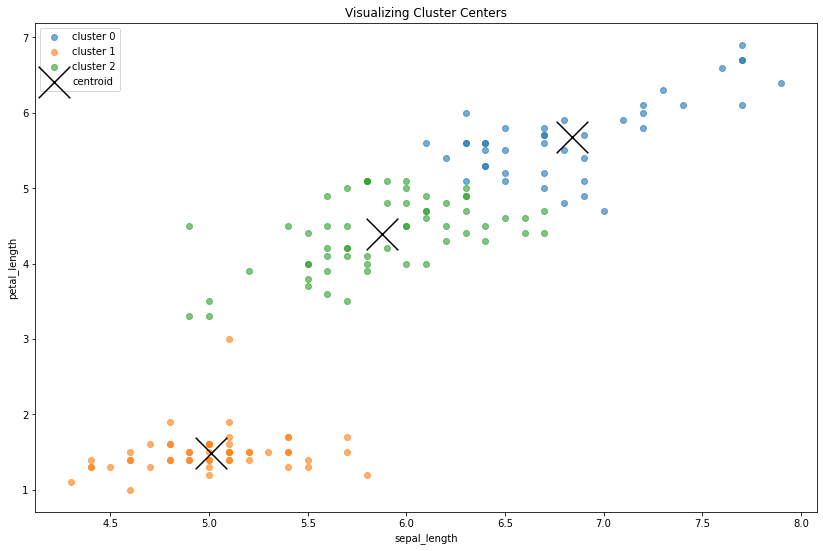

In [31]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris_df.groupby('cluster'):
    plt.scatter(subset.sepal_len, subset.petal_len, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_len', x='sepal_len', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Cluster Centers')